Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
#Loading the dataset
df = pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#Checking the columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
#Checking the shape of the dataset
df.shape

(891, 12)

In [5]:
#Checking the datatype of the columns
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
#Checking the information of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Observation:

1-All the columns are numeric except name,sex,ticket,cabin.embarked
2-The dataset consist of 891 rows and12 columns.

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

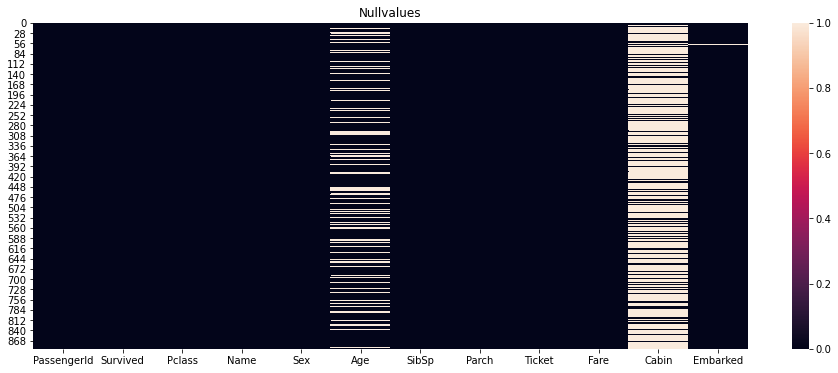

In [8]:
# showing the null values using heatmap
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("Nullvalues")
plt.show()

In [10]:
df['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [11]:
df['Cabin'].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

Seeing all that we can say that roughly 20 percent of the Age data is missing and 80 percent of the cabin data is missing.


In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


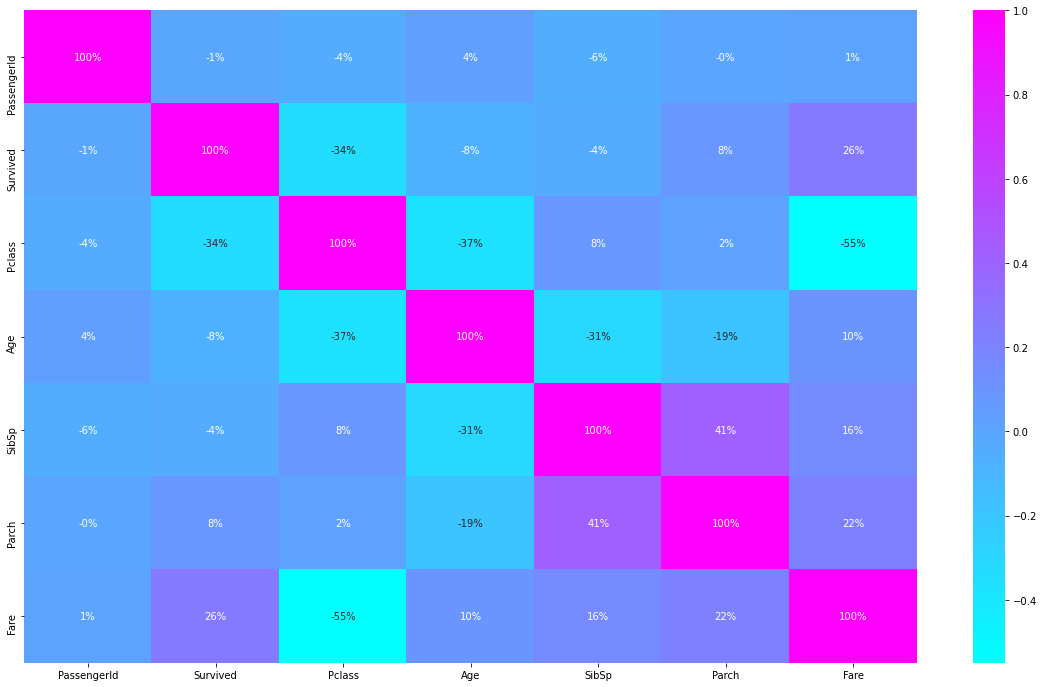

In [18]:
#Seeing the correlation via visualization
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,fmt='.0%',cmap='cool')
plt.show()

 pclass and fare are highly negatively correlated

<AxesSubplot:xlabel='Survived', ylabel='count'>

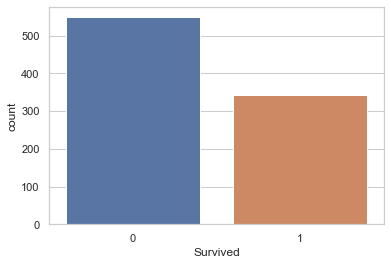

In [19]:
#Passenger Survival

sns.set(style='whitegrid')   #Background
sns.countplot(x='Survived',data=df)    #sns.countplot(df['Survived'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

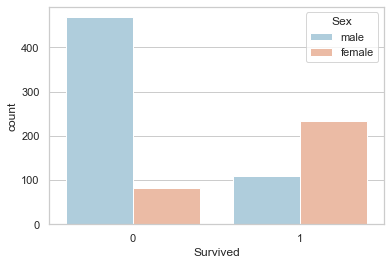

In [20]:
#Passenger Servival based on Sex

sns.set(style='whitegrid') 
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

male passengers are not survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

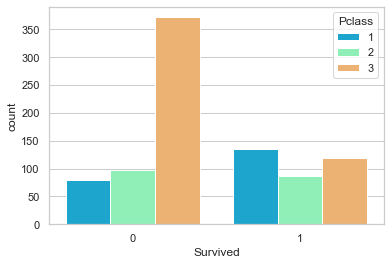

In [21]:
#Passenger Survival based on passenger class

sns.set(style='whitegrid') 
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

According to pclass 3rd class passengers died majorly

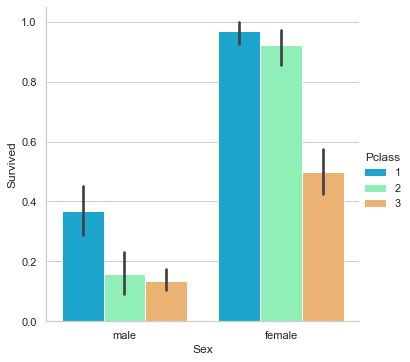

In [22]:
#Passenger Survival based on Sex and Class

sns.set(style='whitegrid') 
sns.catplot(x='Sex',y='Survived',hue='Pclass',data=df,palette='rainbow',kind='bar')

Female of 1st and 2nd class are majorly survived

<AxesSubplot:xlabel='Age'>

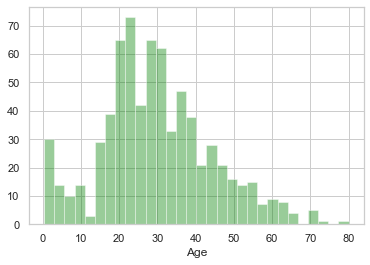

In [23]:
#Here we se avg age of people travelling
sns.distplot(df['Age'].dropna(),kde=False,color='green',bins=30)

#Here we drop NaN value.

<AxesSubplot:>

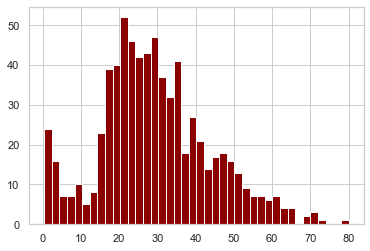

In [24]:
# Another way of seeing the above plot is via hist plot

df['Age'].hist(bins=40,color='darkred')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

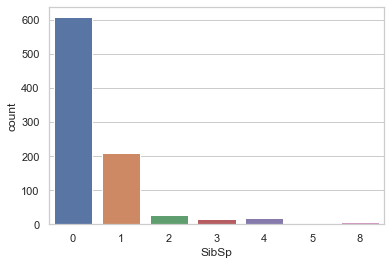

In [25]:
#Here we try to get Siblings And Spouse count
sns.countplot(x='SibSp',data=df)

<AxesSubplot:xlabel='Fare'>

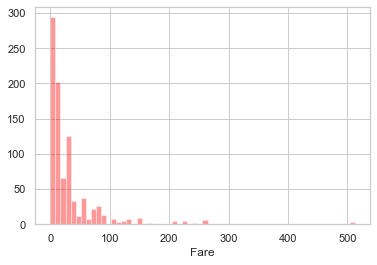

In [26]:
#Seeing paid by passengers in dollars

sns.distplot(df['Fare'],kde=False,color='red',bins=60)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

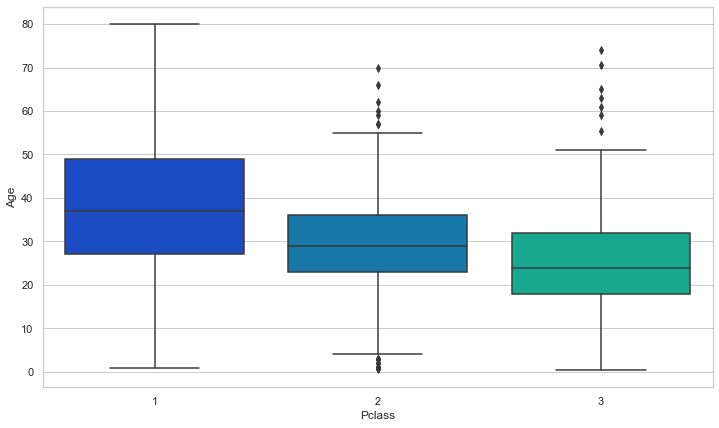

In [27]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

We can see the wealthier passeneger in the higher class tend to be older, which makes sense. We will use these avg values to impute based on Pclass for Age

In [28]:
def impute_age (cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        if Pclass==3:
            return 24
    else:
        return Age

In [29]:
#Now Apply that function

df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

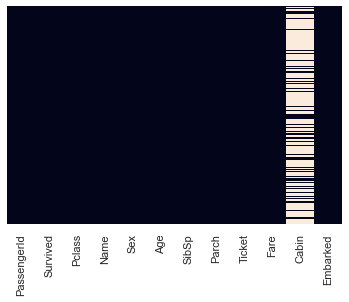

In [30]:
#Now Check it via Heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [31]:
#Now go ahead and drop the Cabin column because it is not important in our model training.

df.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

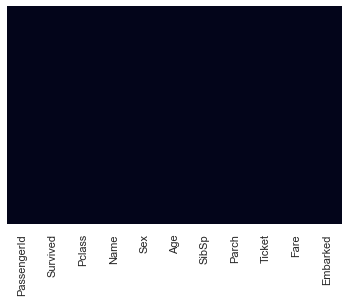

In [32]:
#Now Check it via Heatmap

sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

## Converting Categorical Features

We have to convert the Categorical data into dummy variables using pandas otherwise our machine learning algorithm won't be able to directly take in those features as input.

In [33]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

#Here drop_first=True means we dropped first column because 00 automatically represent the first column

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [34]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
embark=pd.get_dummies(df['Embarked'],drop_first=True)

In [35]:
#Droppng the columns which is not required

df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [36]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [37]:
#Now adding the sex and embark column in dataset

df=pd.concat([df,sex,embark],axis=1)

In [38]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Plotting outliers

In [39]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')

<AxesSubplot:>

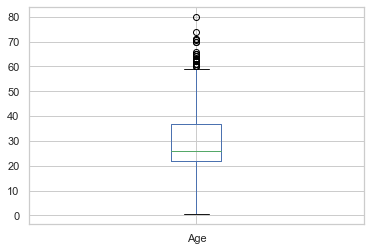

In [40]:
df['Age'].plot.box()

<AxesSubplot:>

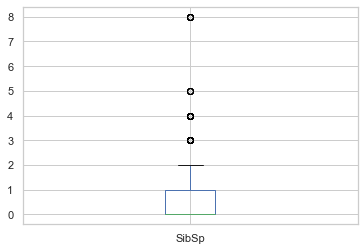

In [41]:
df['SibSp'].plot.box()

<AxesSubplot:>

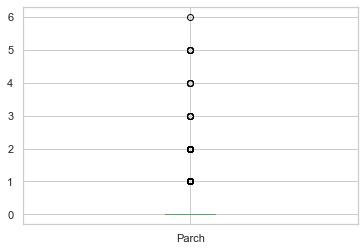

In [42]:
df['Parch'].plot.box()

<AxesSubplot:>

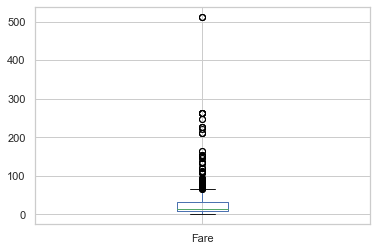

In [43]:
df['Fare'].plot.box()

In [44]:
df.shape

(891, 10)

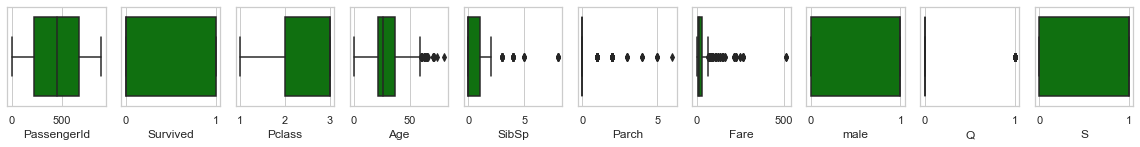

In [45]:
collist=df.columns.values
ncol=10
nrows=10
plt.figure(figsize=(16,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

### To check the distribution of Skewness

<AxesSubplot:xlabel='Age', ylabel='Density'>

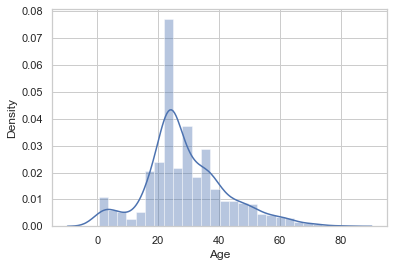

In [46]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

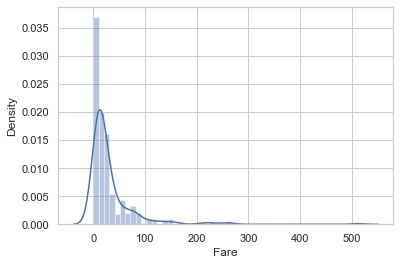

In [47]:
sns.distplot(df['Fare'])

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

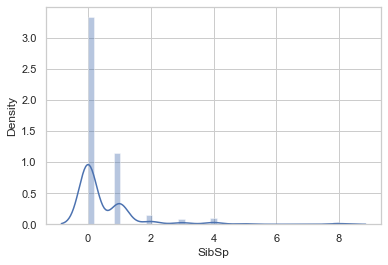

In [48]:
sns.distplot(df['SibSp'])

### Bivariate Analysis

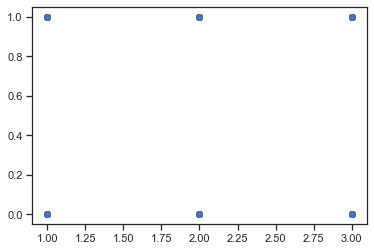

In [53]:
sns.set_style('ticks')
plt.scatter(df['Pclass'],df['Survived'])

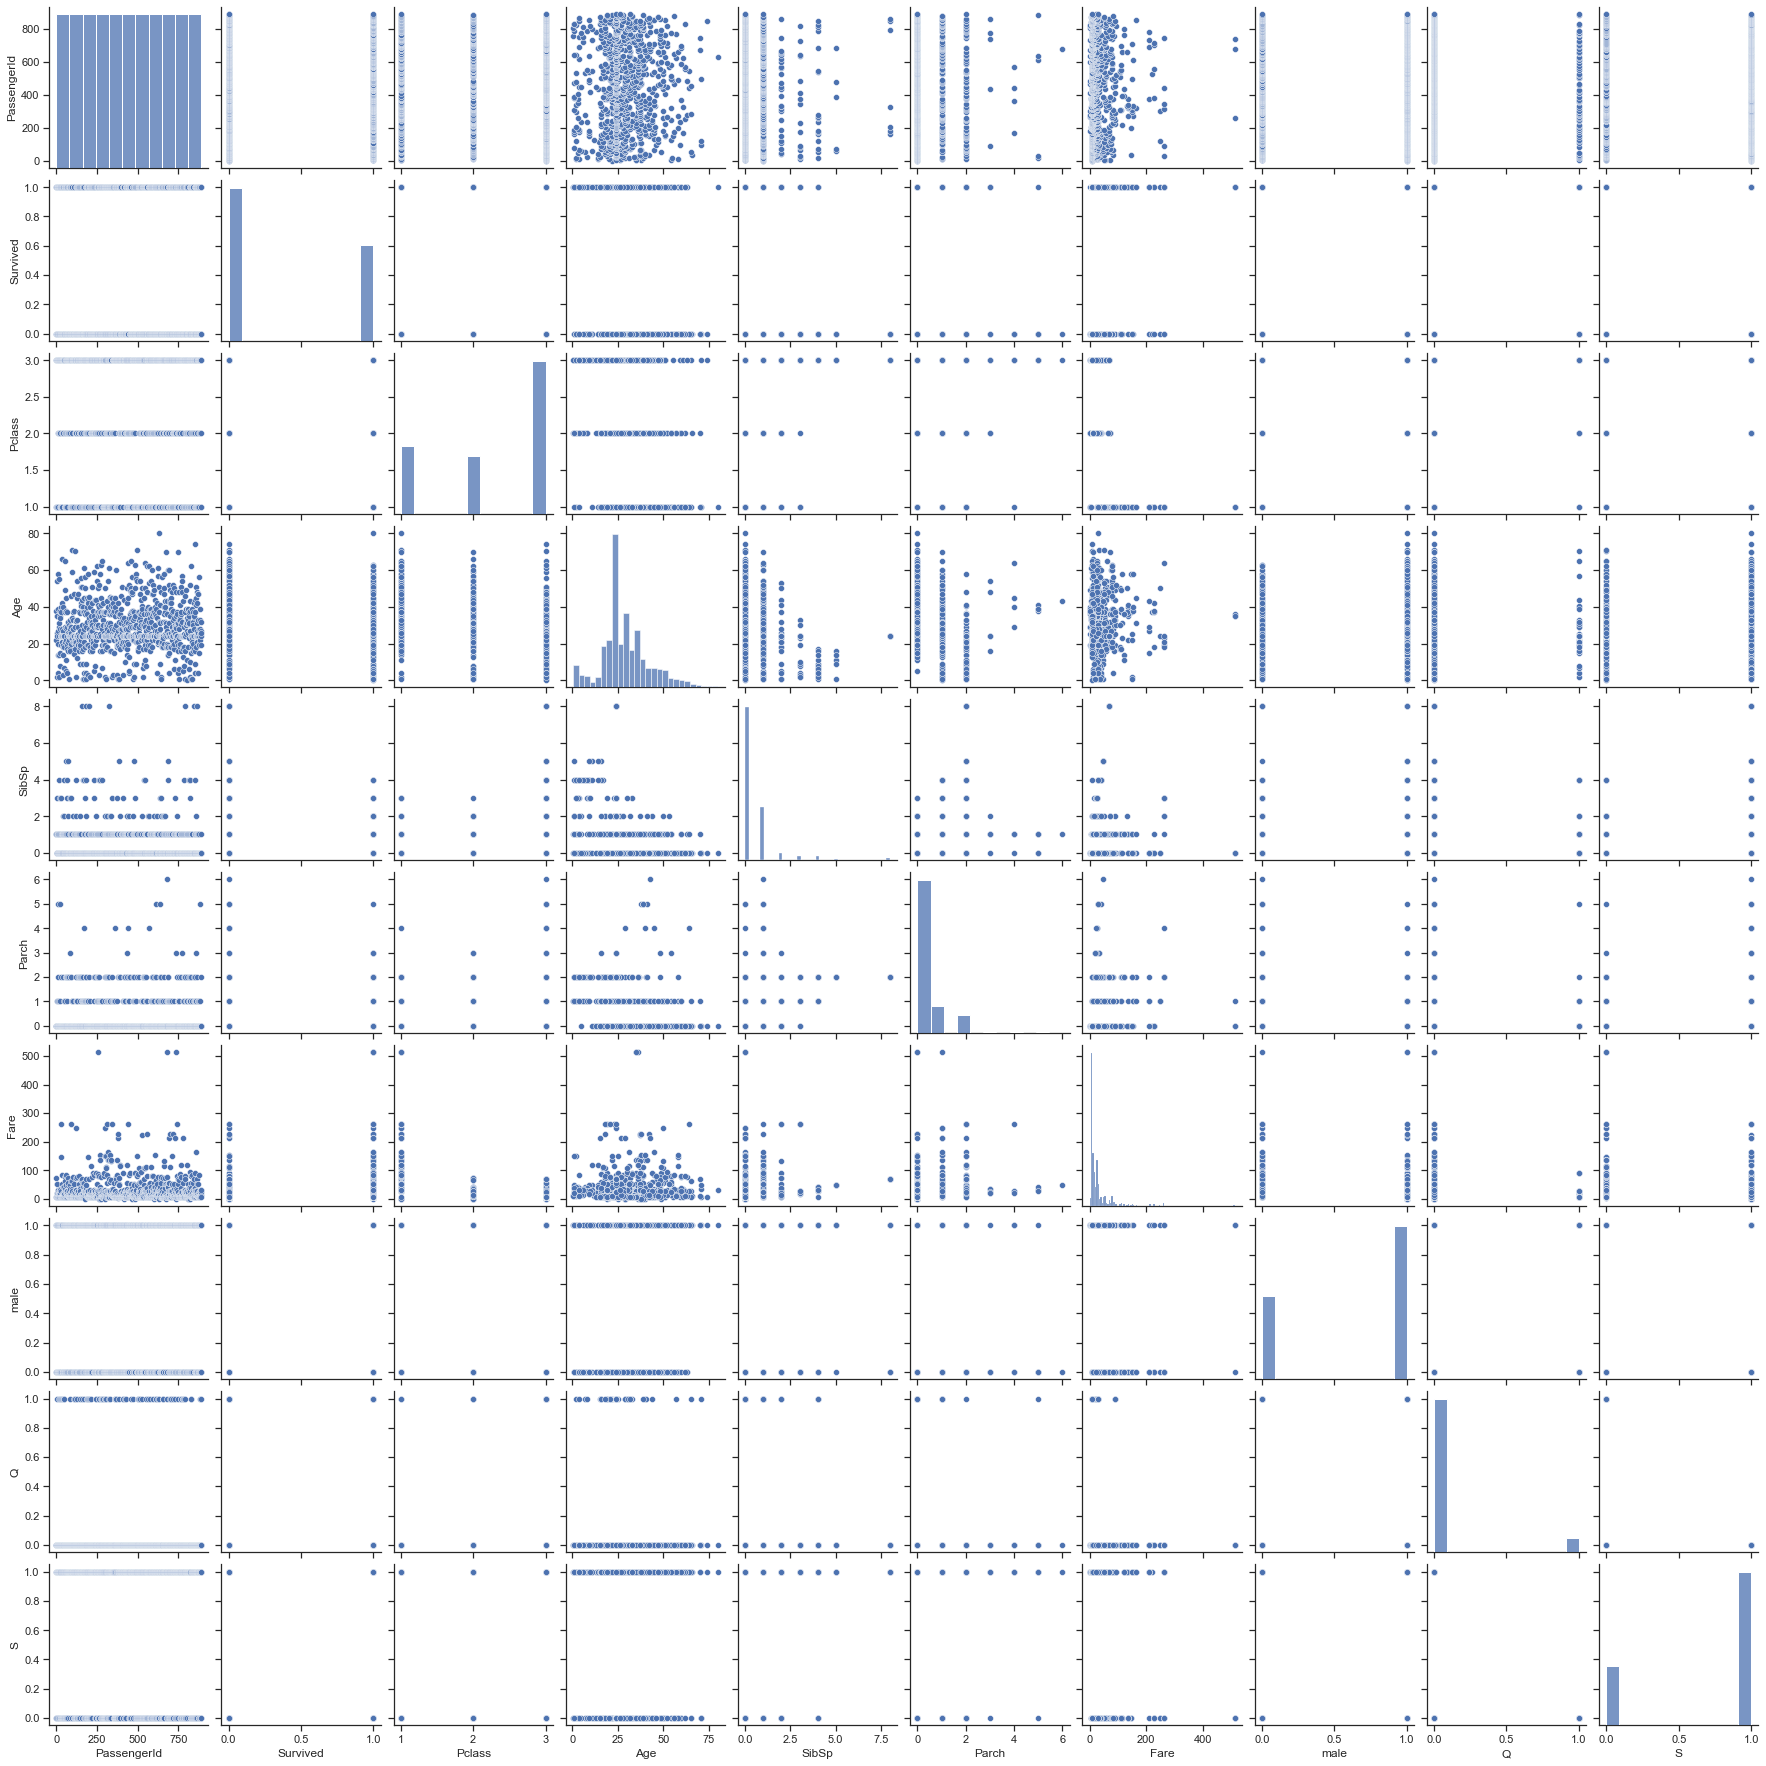

In [54]:
sns.pairplot(df)

### Removing Outliers

In [55]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.73010796, 0.78927234, 0.82737724, ..., 0.73769513, 0.30756234,
        0.61930636],
       [1.72622007, 1.2669898 , 1.56610693, ..., 1.35557354, 0.30756234,
        1.61470971],
       [1.72233219, 1.2669898 , 0.82737724, ..., 1.35557354, 0.30756234,
        0.61930636],
       ...,
       [1.72233219, 0.78927234, 0.82737724, ..., 1.35557354, 0.30756234,
        0.61930636],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.73769513, 0.30756234,
        1.61470971],
       [1.73010796, 0.78927234, 0.82737724, ..., 0.73769513, 3.25137334,
        1.61470971]])

In [56]:
threshold=3
print(np.where(z>3))

(array([  5,  13,  16,  16,  22,  25,  27,  28,  32,  44,  46,  47,  50,
        59,  68,  71,  82,  86,  88,  96, 109, 116, 116, 118, 119, 126,
       143, 156, 159, 164, 167, 171, 171, 180, 182, 186, 188, 196, 198,
       201, 208, 214, 233, 241, 245, 258, 260, 261, 264, 266, 274, 278,
       278, 280, 289, 299, 300, 301, 303, 311, 322, 324, 330, 341, 358,
       359, 360, 364, 368, 377, 380, 386, 388, 411, 412, 421, 428, 437,
       438, 438, 459, 468, 480, 493, 501, 502, 510, 517, 525, 527, 541,
       542, 552, 557, 560, 567, 573, 593, 610, 612, 613, 626, 629, 630,
       638, 653, 654, 657, 672, 678, 679, 680, 683, 686, 689, 697, 700,
       703, 716, 718, 727, 730, 736, 737, 742, 745, 749, 767, 768, 774,
       776, 778, 779, 787, 787, 790, 792, 813, 824, 825, 828, 846, 850,
       851, 858, 863, 885, 885, 890], dtype=int64), array([8, 5, 4, 8, 8, 5, 6, 8, 8, 8, 8, 8, 4, 4, 4, 4, 8, 5, 6, 3, 8, 3,
       8, 6, 4, 8, 8, 8, 4, 4, 5, 4, 8, 4, 4, 8, 8, 8, 8, 4, 8, 8, 4, 8,
       8,

In [57]:
df_new=df[(z<3).all(axis=1)]

In [58]:
df_new.shape

(749, 10)

In [59]:
df.shape

(891, 10)

In [60]:
df=df_new
df.shape

(749, 10)

<AxesSubplot:xlabel='Survived', ylabel='count'>

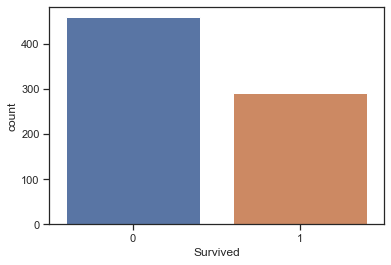

In [61]:
sns.countplot(df['Survived'])

### Separating the features and labels

In [62]:
x = df.drop('Survived', axis=1)
y= df['Survived']

In [63]:
df.skew()

PassengerId   -0.003230
Survived       0.464144
Pclass        -0.507696
Age            0.345908
SibSp          1.960537
Parch          2.004702
Fare           2.216286
male          -0.732070
Q              0.000000
S             -1.449695
dtype: float64

In [64]:
# importing power transform
from sklearn.preprocessing import power_transform
df_new = power_transform(x)
df_new = pd.DataFrame(df_new,columns=x.columns)

In [65]:
df_new.skew()

PassengerId   -0.282112
Pclass        -0.349721
Age            0.032860
SibSp          0.904649
Parch          1.470364
Fare          -0.005842
male          -0.732070
Q              0.000000
S             -1.449695
dtype: float64

In [66]:
#data scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

###### checking multicollineriaty

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,1.005766,PassengerId
1,2.230423,Pclass
2,1.355889,Age
3,1.191505,SibSp
4,1.298448,Parch
5,2.227457,Fare
6,1.167820,male
7,NaN,Q
8,1.071754,S


In [68]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x_scaled, y)

ExtraTreesRegressor()

In [69]:
print(selection.feature_importances_)

[0.15331447 0.10741345 0.19681003 0.03575322 0.03283117 0.15985867
 0.29302578 0.         0.02099321]


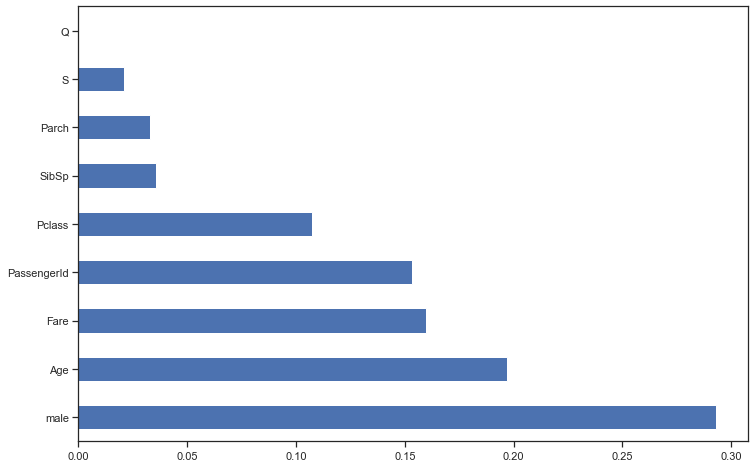

In [70]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

##### sex is the most important feature

#### model selection

In [71]:
#Importing all the model Library

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Importing Boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold,train_test_split

In [73]:
# checking for best random state

maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.33, random_state=i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ",maxAccu,"on Random State: ",maxRS)

Best accuracy is:  0.842741935483871 on Random State:  188


In [74]:
# creating train test split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=188)

### DecisionTreeClassifier

In [75]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
target_names = ['class 0','class 1']
print("Accuracy Score: {}".format(accuracy_score(y_test,preddt)*100))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt,target_names=target_names,))

Accuracy Score: 79.55555555555556
[[118  22]
 [ 24  61]]
              precision    recall  f1-score   support

     class 0       0.83      0.84      0.84       140
     class 1       0.73      0.72      0.73        85

    accuracy                           0.80       225
   macro avg       0.78      0.78      0.78       225
weighted avg       0.79      0.80      0.80       225



### RandomForestClassifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
target_names = ['class 0','class 1']
print("Accuracy Score: {}".format(accuracy_score(y_test,predrf)*100))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf,target_names=target_names))

Accuracy Score: 80.88888888888889
[[121  19]
 [ 24  61]]
              precision    recall  f1-score   support

     class 0       0.83      0.86      0.85       140
     class 1       0.76      0.72      0.74        85

    accuracy                           0.81       225
   macro avg       0.80      0.79      0.79       225
weighted avg       0.81      0.81      0.81       225



### K nearest neighbors

In [77]:
# By using K nearest neighbors

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predknn = knn.predict(x_test)
print("Accuracy Score: {}".format(accuracy_score(y_test, predknn)*100))
target_names = ['class 0','class 1']
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn,target_names=target_names))

Accuracy Score: 84.88888888888889
[[124  16]
 [ 18  67]]
              precision    recall  f1-score   support

     class 0       0.87      0.89      0.88       140
     class 1       0.81      0.79      0.80        85

    accuracy                           0.85       225
   macro avg       0.84      0.84      0.84       225
weighted avg       0.85      0.85      0.85       225



### Naive Bayes

In [78]:
# By using Naive Bayes

gnb = GaussianNB()
gnb.fit(x_train, y_train)
predgnb = gnb.predict(x_test)
target_names = ['class 0','class 1']
print("Accuracy Score: {}".format(accuracy_score(y_test, predgnb)*100))
print(confusion_matrix(y_test, predgnb))
print(classification_report(y_test, predgnb,target_names=target_names))

Accuracy Score: 81.33333333333333
[[119  21]
 [ 21  64]]
              precision    recall  f1-score   support

     class 0       0.85      0.85      0.85       140
     class 1       0.75      0.75      0.75        85

    accuracy                           0.81       225
   macro avg       0.80      0.80      0.80       225
weighted avg       0.81      0.81      0.81       225



#### cross validation

In [79]:
# checking cross validation score

models = []
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))

maxx_acc = 0
for name, model in models:
    kfold = KFold(n_splits=10)
    cv = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    result = cv.mean()
    print('{}: {}'.format(name, result))
    if result > maxx_acc:
        maxx_acc = result
        b_model = name
print("The best model is {} with the accuracy {:.2f}".format(b_model, maxx_acc))

Naive Bayes: 0.7552612481857766
Decision Tree: 0.7269593613933237
Random Forest: 0.7974963715529753
KNN: 0.749854862119013
The best model is Random Forest with the accuracy 0.80


#### Hyperparameter tuning using grid searchcv

In [80]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(RandomForestClassifier(), hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(x_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 15.4min finished


In [81]:
bestF.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [82]:
mod = RandomForestClassifier( max_depth=30, n_estimators=100,min_samples_split=5,min_samples_leaf= 1)
mod.fit(x_train, y_train)
prediction = mod.predict(x_test)
print("Accuracy Score: {}".format(accuracy_score(y_test, prediction)))

Accuracy Score: 0.8355555555555556


Text(52.0, 0.5, 'True Value')

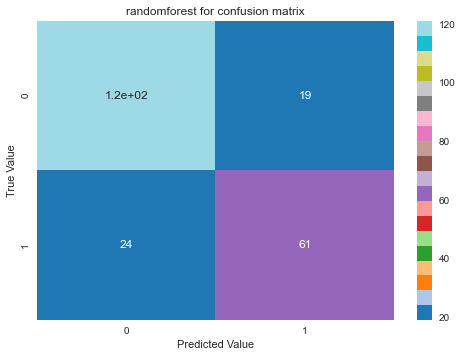

In [88]:
#Printing Confusion Matrix 

cfm=confusion_matrix(y_test,predrf)

sns.heatmap(cfm,annot=True,cmap='tab20')
plt.title('randomforest for confusion matrix')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

### Checking how much our predictions are correct

In [83]:
predictions1 = pd.DataFrame({'predictions': prediction, 'Real Values': y_test})
predictions1

,predictions,Real Values
470,0,0
58,1,1
666,0,0
436,0,0
523,1,1
...,...,...
486,1,1
640,0,0
314,0,0
397,0,0


#### Plotting ROC AUC curve

In [84]:
# predicting probabilities
pred_prob1 = gnb.predict_proba(x_test)
pred_prob2 = dt.predict_proba(x_test)
pred_prob3 = knn.predict_proba(x_test)
pred_prob4 = rf.predict_proba(x_test)

In [85]:
from sklearn.metrics import roc_curve

# roc curve for model
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr=fpr
random_prob = [0 for i in range(len(y_test))]
fpr, tpr, _ = roc_curve(y_test, random_prob, pos_label=1)

In [86]:
from sklearn.metrics import roc_auc_score

# auc score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
print(auc_score1, auc_score2, auc_score3, auc_score4)

0.8571428571428572 0.7802521008403361 0.8826890756302521 0.8841596638655462


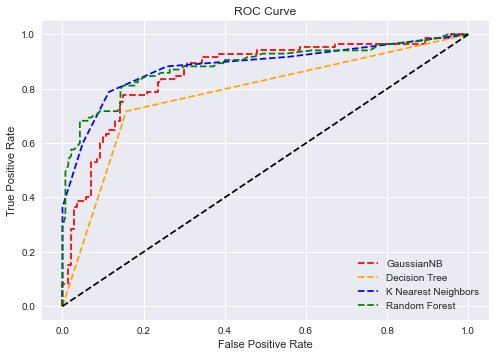

In [87]:
plt.style.use('seaborn')

# plot roc curve
plt.plot(fpr1, tpr1, linestyle='--', color='red', label='GaussianNB')
plt.plot(fpr2, tpr2, linestyle='--', color='orange', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--', color='blue', label='K Nearest Neighbors')
plt.plot(fpr4, tpr4, linestyle='--', color='green', label='Random Forest')
plt.plot(fpr, tpr, linestyle='--', color='black')

#title
plt.title('ROC Curve')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

### Saving the model

In [89]:
import joblib
joblib.dump(mod, 'Titanic.pkl')

['Titanic.pkl']

#### Loading the saved model

In [90]:
model = joblib.load('Titanic.pkl')
pred = model.predict(x_test)
print(accuracy_score(y_test, prediction))

0.8355555555555556
